### 4.3.4 A magic fix of the numerical method

Let us interpret the adjusted scheme mathematically. We interpret $\frac{u^{n+1}-u^{n}}{\Delta t} = v^{n}$ as the differential equation at mesh point $t_n,$ because we have $v^n$ on the right-hand side. The left-hand side is then a $forward difference$ or Forward Euler approximation to the derivative $u'$,. 

On the other hand, we interpret $\frac{v^{n+1}-v^{n}}{\Delta t}=-\omega^2 u^{n+1}$ as the differential equation sampled at mesh point $t_{n+1}$, since we have $u^{n+1}$ on the right hand side. In this case, the difference approximation on the left-hand side is a $backward$ $difference$,

$$ v'(t_{n+1}) \approx \frac {v^{n+1}-v^{n}}{\Delta t} \qquad or \qquad v'(t_n) \approx {v^{n}-v^{n-1}}{\Delta t}$$.

N_t: 800


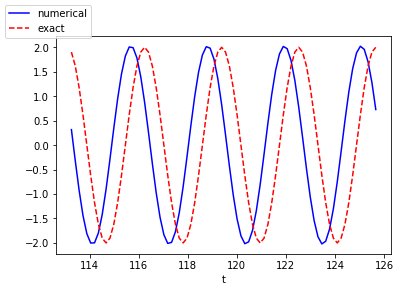

0.7283057044967003 -3.5035725322034139


In [6]:
 from numpy import zeros, linspace, pi, cos
 import matplotlib.pyplot as plt
 
 omega = 2
 P = 2*pi/omega
 dt = P/20 # P/40, P/160, P/2000 for comparison
 T = 40*P
 N_t = int(round(T/dt))
 t = linspace(0, N_t*dt, N_t+1)
 print('N_t:', N_t)
 
 u = zeros(N_t+1)
 v = zeros(N_t+1)
 
 # Initial condition
 X_0 = 2
 u[0] = X_0
 v[0] = 0
  
 # Step equations forward in time
 for n in range(N_t):
     v[n+1] = v[n] - dt*omega**2*u[n]
     u[n+1] = u[n] + dt*v[n+1]
  
 # Plot the last four periods to illustrate the accuracy
 # in long time simulations
 N4l = int(round(4*P/dt))  # No of intervals to be plotted
 fig = plt.figure()
 l1, l2 = plt.plot(t[-N4l:], u[-N4l:], 'b-',
                    t[-N4l:], X_0*cos(omega*t)[-N4l:], 'r--')
 fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
 plt.xlabel('t')
 plt.show()
 #plt.savefig('tmp.pdf'); plt.savefig('tmp.png')
 print('%.16f %.16f' % (u[-1], v[-1]))

To summarize, using a forward difference for the first equation and a backward difference for the second equation results in a much better method than just using forward differences in both equations.